In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Data.csv', low_memory=False)

In [3]:
sample = df

/home/dusan/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
100%|██████████| 12/12 [24:22<00:00, 174.23s/it]


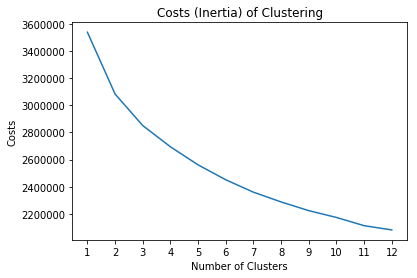

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = []
costs = []
scaler = MinMaxScaler().fit(sample) 
x = pd.DataFrame(scaler.transform(sample))

for i in tqdm(range(1,13)):
    km=KMeans(n_clusters=i, init ='k-means++',n_init=20)#max_iter default 300
    km=km.fit(x)                                        #tol default 1e-4, 
                                                        #same results for higher maax_iter and smaller tol
    clusters.append(i)
    costs.append(km.inertia_)
    
plt.figure()
plt.plot(clusters, costs)
plt.title("Costs (Inertia) of Clustering")
plt.ylabel("Costs")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,13,1))
plt.show()

In [5]:
#we make 5 clusters
km=KMeans(n_clusters=5,init ='k-means++',n_init=20)
clusters=km.fit_predict(x)

#clustering done on whole data, name sample stayed from before when we clustered sampled data
sample["Cluster"]=clusters
sample

,lighting,cityOrCountryside,intersection,atmosphericCondition,collisionType,period,work_day,near_holiday,roadCategory,trafficType,...,situationofAccident,Curve,Condition,userCategory,severity,sex,reasonForTraveling,safetyEquipment,age,Cluster
0,1,2,1,8.0,3.0,1,1,2,3.0,2.0,...,1.0,1,1.0,1,1,2,6.0,1.0,33,1
1,1,2,1,8.0,3.0,1,1,2,3.0,2.0,...,1.0,1,1.0,1,3,1,6.0,1.0,16,2
2,1,2,6,1.0,6.0,2,1,2,3.0,1.0,...,1.0,1,1.0,1,3,1,5.0,1.0,56,2
3,1,2,6,1.0,6.0,2,1,2,3.0,1.0,...,1.0,1,1.0,2,3,1,6.0,1.0,16,2
4,1,2,6,1.0,6.0,2,1,2,3.0,1.0,...,1.0,1,1.0,2,3,2,6.0,1.0,54,1
5,1,1,1,1.0,6.0,4,1,1,3.0,2.0,...,2.0,1,2.0,1,1,1,1.0,1.0,19,0
6,2,2,1,7.0,3.0,4,1,1,4.0,2.0,...,1.0,2,1.0,1,3,1,5.0,3.0,17,2
7,2,2,1,7.0,3.0,4,1,1,4.0,2.0,...,1.0,2,1.0,2,4,1,6.0,3.0,17,2
8,2,2,1,7.0,3.0,4,1,1,4.0,2.0,...,1.0,2,1.0,1,1,2,6.0,1.0,31,1
9,1,2,3,1.0,3.0,1,1,1,4.0,2.0,...,1.0,2,1.0,1,3,2,3.0,1.0,59,1


In [ ]:
#silhouette_score(x,clusters) #sample od 90k 0.32279978529100606

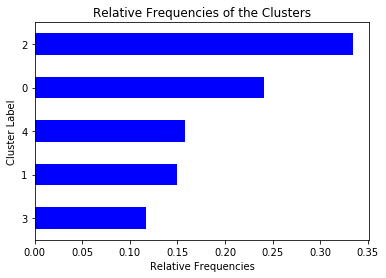

In [6]:
#frequency of every cluster
freq=sample.Cluster.value_counts(normalize=True, ascending=True)
freq.plot(kind="barh", color="Blue")
plt.title("Relative Frequencies of the Clusters")
plt.xlabel("Relative Frequencies")
plt.ylabel("Cluster Label")
plt.show()


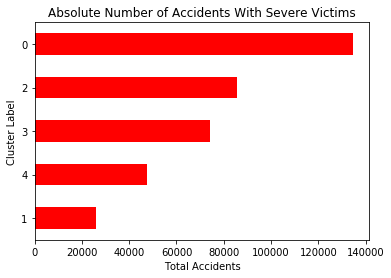

In [9]:
#number of severe victims(hospitilized or fatal injuries)
injuries=sample[(sample["severity"]==2) | (sample["severity"]==3)]
freq=injuries.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of accidents with severe victims")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [10]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_injured = injuries.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(0,5,1)

df_injuries = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total severe victims" :  total_injured,"x(%) risk" : risk*100})
df_injuries

,cluster,total accidents,total deaths,x(%) risk
0,0,406099,134850,33.206189
1,1,252069,26142,10.370970
2,2,565441,85425,15.107677
3,3,197030,74320,37.720144
4,4,267433,47552,17.780902


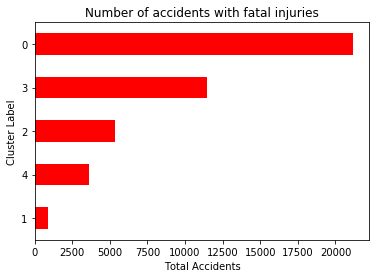

In [13]:
deaths=sample[sample["severity"]==2]
freq=deaths.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of accidents with fatal injuries")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [14]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_injured = deaths.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(0,5,1)

df_deaths = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total deaths" :  total_injured,"x(%) risk" : risk*100})
df_deaths

,cluster,total accidents,total deaths,x(%) risk
0,0,406099,21192,5.218432
1,1,252069,913,0.362202
2,2,565441,5336,0.943688
3,3,197030,11492,5.832614
4,4,267433,3649,1.364454


In [15]:
#odredjivanje prosecnih vrednosti za odabrane atribute
#lighting roadCategory atmosphericCondition Curve safetyEquipment
data_lighting = df.groupby(by="lighting", as_index=False).count()
data_lighting = data_lighting.iloc[:,1]/data_lighting.iloc[:,1].sum()

data_roadCategory = df.groupby(by='roadCategory', as_index=False).count()
data_roadCategory = data_roadCategory.iloc[:,1]/data_roadCategory.iloc[:,1].sum()

data_atmCond = df.groupby(by="atmosphericCondition", as_index=False).count()
data_atmCond = data_atmCond.iloc[:,1]/data_atmCond.iloc[:,1].sum()

data_curve = df.groupby(by="Curve", as_index=False).count()
data_curve = data_curve.iloc[:,1]/data_curve.iloc[:,1].sum()

data_safetyEq = df.groupby(by="safetyEquipment", as_index=False).count()
data_safetyEq = data_safetyEq.iloc[:,1]/data_safetyEq.iloc[:,1].sum()

In [16]:
cluster_0 = sample.loc[sample["Cluster"] == 0]

cl0_lighting = cluster_0.groupby(by="lighting", as_index=False).count()

#key={1:"Full day", 2: "Twilight or dawn", 3:"Night without public lighting",
#        4:"Night with public lighting", 5:"Night with public lighting on"}
#cl3_lighting.lighting=cl3_lighting.lighting.apply(lambda x: key[x])
cl0_lighting["pctg"] = cl0_lighting.iloc[:,1]/cl0_lighting.iloc[:,1].sum() 


cl0_roadCtg = cluster_0.groupby(by="roadCategory", as_index=False).count()

#key={1:"Highway", 2: "National Road", 3:" Departmental Road",
#        4:"Communal Way", 5:"other"}
#cl3_roadCtg.roadCategory =cl3_roadCtg.roadCategory.apply(lambda x: key[x])
cl0_roadCtg["pctg"] = cl0_roadCtg.iloc[:,1]/cl0_roadCtg.iloc[:,1].sum() 


cl0_atmCond = cluster_0.groupby(by="atmosphericCondition", as_index=False).count()
cl0_atmCond["pctg"] = cl0_atmCond.iloc[:,1]/cl0_atmCond.iloc[:,1].sum() 


cl0_curve = cluster_0.groupby(by="Curve", as_index=False).count()
cl0_curve["pctg"] = cl0_curve.iloc[:,1]/cl0_curve.iloc[:,1].sum() 


cl0_safetyEq = cluster_0.groupby(by="safetyEquipment", as_index=False).count()
cl0_safetyEq["pctg"] = cl0_safetyEq.iloc[:,1]/cl0_safetyEq.iloc[:,1].sum() 

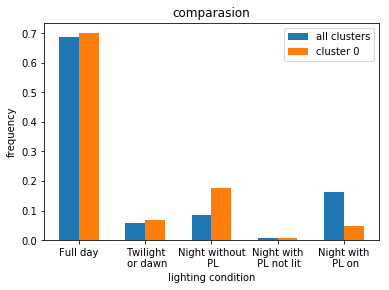

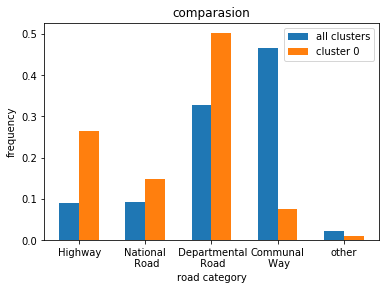

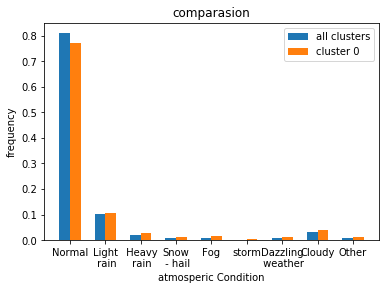

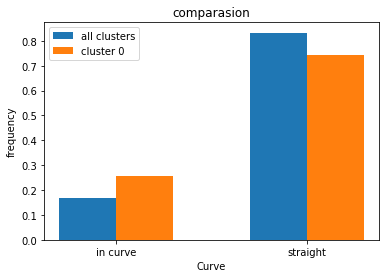

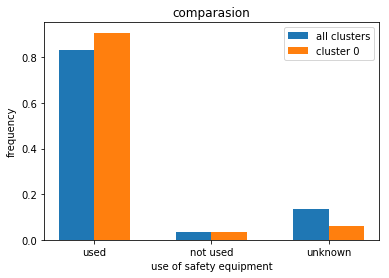

In [19]:
import matplotlib.pyplot as plt

index = np.arange(5)
bar_width = 0.3

fig, ax = plt.subplots()
average = ax.bar(index, data_lighting, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl0_lighting.pctg,bar_width, label="cluster 0")

ax.set_xlabel('lighting condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Full day", "Twilight\n or dawn", "Night without\n PL",
                    "Night with\n PL not lit", "Night with\n PL on"])

ax.legend()

plt.show()


index = np.arange(5)
fig, ax = plt.subplots()
average = ax.bar(index, data_roadCategory, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl0_roadCtg.pctg,bar_width, label="cluster 0")

ax.set_xlabel('road category')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Highway", "National\n Road", " Departmental\n Road",
                    "Communal\n Way", "other"])

ax.legend()

plt.show()



index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_atmCond, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl0_atmCond.pctg,bar_width, label="cluster 0")

ax.set_xlabel('atmosperic Condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Normal", "Light\n rain", " Heavy\n rain",
                    "Snow\n - hail", "Fog","storm","Dazzling\n weather","Cloudy","Other"])

ax.legend()

plt.show()



index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_curve, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl0_curve.pctg,bar_width, label="cluster 0")

ax.set_xlabel('Curve')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["in curve", "straight"])

ax.legend()

plt.show()


index = np.arange(3)
fig, ax = plt.subplots()
average = ax.bar(index, data_safetyEq, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl0_safetyEq.pctg,bar_width, label="cluster 0")

ax.set_xlabel('use of safety equipment')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["used", "not used","unknown"])

ax.legend()

plt.show()

In [20]:
cluster_3 = sample.loc[sample["Cluster"] == 3]

cl3_lighting = cluster_3.groupby(by="lighting", as_index=False).count()

#key={1:"Full day", 2: "Twilight or dawn", 3:"Night without public lighting",
#        4:"Night with public lighting", 5:"Night with public lighting on"}
#cl3_lighting.lighting=cl3_lighting.lighting.apply(lambda x: key[x])
cl3_lighting["pctg"] = cl3_lighting.iloc[:,1]/cl3_lighting.iloc[:,1].sum() 


cl3_roadCtg = cluster_3.groupby(by="roadCategory", as_index=False).count()

#key={1:"Highway", 2: "National Road", 3:" Departmental Road",
#        4:"Communal Way", 5:"other"}
#cl3_roadCtg.roadCategory =cl3_roadCtg.roadCategory.apply(lambda x: key[x])
cl3_roadCtg["pctg"] = cl3_roadCtg.iloc[:,1]/cl3_roadCtg.iloc[:,1].sum() 


cl3_atmCond = cluster_3.groupby(by="atmosphericCondition", as_index=False).count()
cl3_atmCond["pctg"] = cl3_atmCond.iloc[:,1]/cl3_atmCond.iloc[:,1].sum() 


cl3_curve = cluster_3.groupby(by="Curve", as_index=False).count()
cl3_curve["pctg"] = cl3_curve.iloc[:,1]/cl3_curve.iloc[:,1].sum() 


cl3_safetyEq = cluster_3.groupby(by="safetyEquipment", as_index=False).count()
cl3_safetyEq["pctg"] = cl3_safetyEq.iloc[:,1]/cl3_safetyEq.iloc[:,1].sum() 

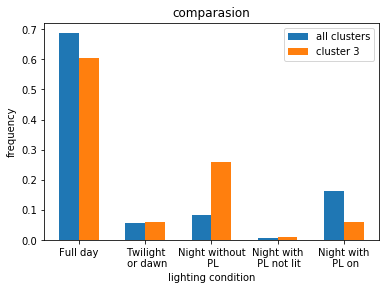

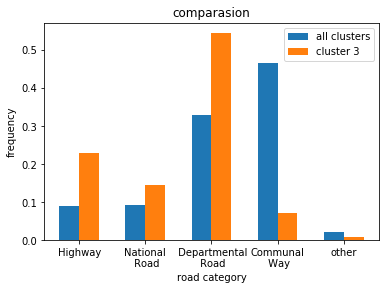

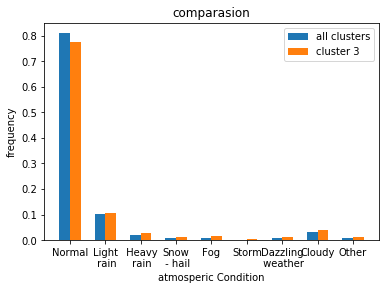

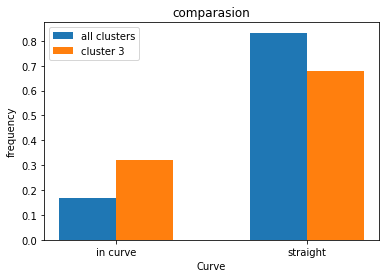

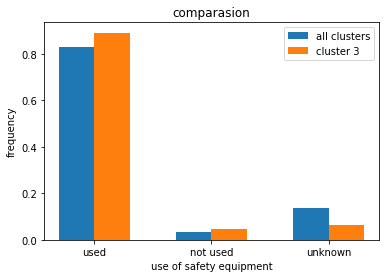

In [21]:
index = np.arange(5)
bar_width = 0.3

fig, ax = plt.subplots()
average = ax.bar(index, data_lighting, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_lighting.pctg,bar_width, label="cluster 3")

ax.set_xlabel('lighting condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Full day", "Twilight\n or dawn", "Night without\n PL",
                    "Night with\n PL not lit", "Night with\n PL on"])

ax.legend()

plt.show()


index = np.arange(5)
fig, ax = plt.subplots()
average = ax.bar(index, data_roadCategory, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_roadCtg.pctg,bar_width, label="cluster 3")

ax.set_xlabel('road category')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Highway", "National\n Road", " Departmental\n Road",
                    "Communal\n Way", "other"])

ax.legend()

plt.show()



index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_atmCond, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_atmCond.pctg,bar_width, label="cluster 3")

ax.set_xlabel('atmosperic Condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Normal", "Light\n rain", " Heavy\n rain",
                    "Snow\n - hail", "Fog\n" ,"Storm","Dazzling\n weather","Cloudy","Other"])

ax.legend()

plt.show()



index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_curve, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_curve.pctg,bar_width, label="cluster 3")

ax.set_xlabel('Curve')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["in curve", "straight"])

ax.legend()

plt.show()


index = np.arange(3)
fig, ax = plt.subplots()
average = ax.bar(index, data_safetyEq, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_safetyEq.pctg,bar_width, label="cluster 3")

ax.set_xlabel('use of safety equipment')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["used", "not used","unknown"])

ax.legend()

plt.show()